<a href="https://colab.research.google.com/github/sheraphineshovan/Imarticus_miniproject/blob/main/Super_Store%5BTimeseries%5Dipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv('Super_Store.csv', encoding = 'cp1252')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [ ]:
df.drop(cols, axis=1)

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840
...,...,...
2116,3/19/2015,383.4656
2117,12/5/2016,13.4000
2118,9/6/2015,85.9800
2119,1/21/2014,25.2480


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace= True)
df.index

DatetimeIndex(['2016-11-08', '2016-11-08', '2015-10-11', '2014-06-09',
               '2014-06-09', '2017-07-16', '2015-09-25', '2015-09-17',
               '2015-09-17', '2016-12-08',
               ...
               '2015-11-13', '2016-06-03', '2016-12-12', '2017-06-01',
               '2015-12-14', '2015-03-19', '2016-12-05', '2015-09-06',
               '2014-01-21', '2017-02-26'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [ ]:
y=df['Sales'].resample('MS').mean()

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 48 entries, 2014-01-01 to 2017-12-01
Freq: MS
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


<Axes: xlabel='Order Date'>

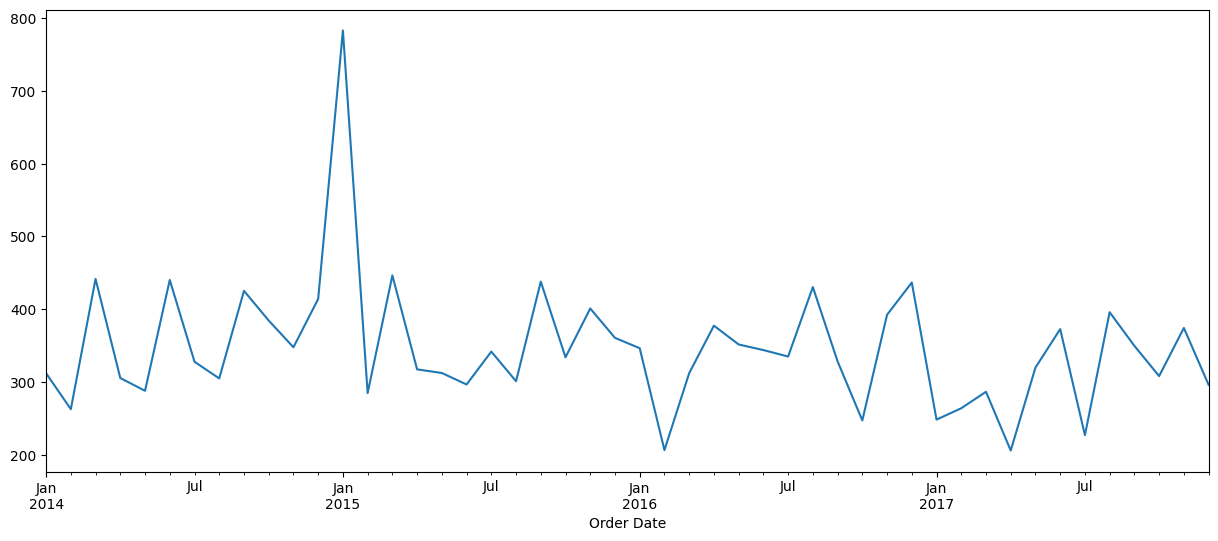

In [ ]:
y.plot(figsize=(15,6))

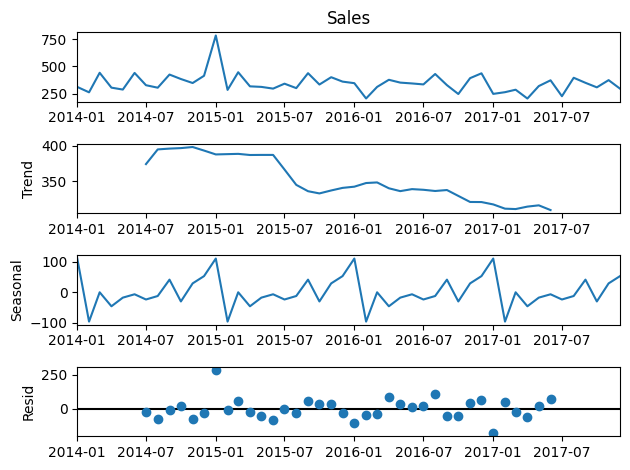

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
series=y
result=seasonal_decompose(series,model='additive')
result.plot()
plt.show()

In [ ]:
result = adfuller(y)
print('ADF: %f' % result[0])
print('p value: %f' % result[1])
for key, value in result[4].items():
    print('%s %.3f' % (key, value))

ADF: -6.962405
p value: 0.000000
1% -3.578
5% -2.925
10% -2.601


In [ ]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

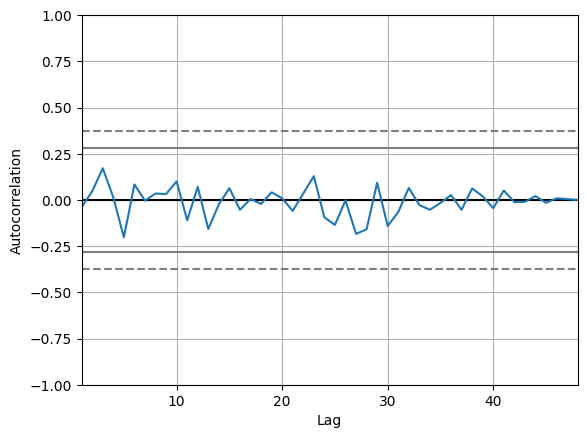

In [ ]:
autocorrelation_plot(y)

In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(y,order=(3,1,3))
result =  model.fit()

In [ ]:
forecast = result.predict(start = '2014-01-01', end = '2018-12-01')

In [ ]:
forecast

2014-01-01      0.000000
2014-02-01    309.499463
2014-03-01    287.630590
2014-04-01    328.363433
2014-05-01    330.093263
2014-06-01    340.265457
2014-07-01    337.295940
2014-08-01    327.119896
2014-09-01    349.473587
2014-10-01    353.040510
2014-11-01    342.441790
2014-12-01    353.941343
2015-01-01    363.650003
2015-02-01    382.968714
2015-03-01    424.001620
2015-04-01    425.154719
2015-05-01    340.542856
2015-06-01    329.554265
2015-07-01    384.660136
2015-08-01    396.864053
2015-09-01    345.894592
2015-10-01    326.516070
2015-11-01    381.185887
2015-12-01    413.076372
2016-01-01    362.512821
2016-02-01    327.316552
2016-03-01    359.107199
2016-04-01    373.899046
2016-05-01    340.100268
2016-06-01    340.104137
2016-07-01    376.170855
2016-08-01    377.079830
2016-09-01    341.145003
2016-10-01    346.825517
2016-11-01    378.339109
2016-12-01    353.213465
2017-01-01    329.878872
2017-02-01    373.529536
2017-03-01    379.932598
2017-04-01    316.348406


In [ ]:
y

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
actual = y
predicted  = forecast['2014-01-01':'2017-12-01']

In [ ]:
rmse_model = np.sqrt(mean_squared_error(actual,predicted))

In [ ]:
print(rmse_model)

99.81782027787385


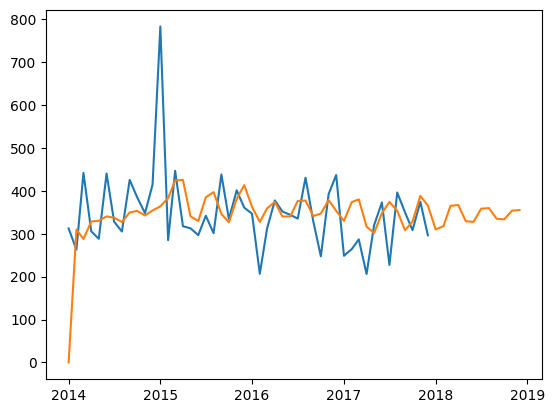

In [ ]:
plt.plot(y)
plt.plot(forecast)
plt.show()